# Описание задачи




Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры необходимо из открытых данных дать рекомендации о запуске рекламных кампаний. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 


Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.




## Получение библиотек и данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np


In [2]:
data = pd.read_csv('/datasets/games.csv')

## Подготовка данных


Преобразуем данные в нужные типы. 
Обработаем  пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод: в исходном датасете почти 17 000 строк, файл достаточно большой
Есть пропуски в некоторых занчениях. 
По задаче нужно Замените названия столбцов (приведите к нижнему регистру); - ок, делаем

In [4]:
data.columns=data.columns.str.lower()

Разберемся со странными значениями tbd из0за которых не получается перевести оценку пользователей в флоат

In [6]:
data.query('user_score =="tbd"')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


много строчек. Аббревиатура tbd оказывается означает  to be determined - то есть "будет определено" Наверное, это может означать что идет процесс сбора оценок
В таком случае, заменять на нули tbd не кажется резонным. 
Посомтрим что со средним и медианным значениям по колонке (за вычетом tbd)

In [7]:
data1 = data.query('user_score !="tbd"')

data1 ['user_score']= data1 ['user_score'].fillna(0)

/tmp/ipykernel_86/3681729487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1 ['user_score']= data1 ['user_score'].fillna(0)


In [8]:
data1['user_score']=data1['user_score'].astype(float)

/tmp/ipykernel_86/2532574063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['user_score']=data1['user_score'].astype(float)


In [9]:
data1['user_score'].mean()

3.784136869358338

In [10]:
median_user_score = data1['user_score'].median()

Лучше использовать медиану, она менее чувствительна в выбросам. И если у нас игры пока в статусе оценки, то лучше использовать нейтральную медиану. Весь этот data1 срез нам нужен был, что бы понять чем заменять tbd значения.

Итак, вывод:
по столбцу user_score: NAN - меняем на нули
tbd - на медиану (медиану сохраняем как переменную)
Потом меняем все типы данных на флоат 

Сразу помянять тип данных не получается


In [11]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Попробуем разобраться с пропусками.

Пропущены достаточно интересные данные:

* 2 строчки с названиями игр и жанров - это немного. Можно заполнить чем то типа "No_name" - так как нам действительно не очень важно название
* Хуже бстоят дела в годом выпуска. Пропущены данные для 2% процентов игр. Это мало. Можно  удаkить эти строки. Замещать каким-то средними по годам будет не корректно. Пожалуй так и поступим
* Еще хуже обстоят дела с оценками критиков и пользователей. Тут нужно разбираться почему данных нет. Гипотезы такие - какие то игры не оценили (было мало продаж. Предлагаю, заменить на нули оценки критиков и юзеров, там где NA. Замена на медианные или средние значения может сильно исказить данные. 
* по столбцу user_score: NAN - меняем на нули tbd - на медиану (медиану сохраняем как переменную) Потом меняем все типы данных на флоат

* Рейтинг тоже много пропущенных значений. и нужно поподробнее разобраться с классификацией



###  Рейтинг

In [12]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Разберемся со значениями, Вики в помощь

EC» («Early childhood») — «Для детей младшего возраста»

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: 

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет 

«M» («Mature») — «Для взрослых»: 

«AO» («Adults Only 18+») — «Только для взрослых»: 

'RP(«Rating Pending») — «Рейтинг ожидается»:

Что интересно:
"K-A" - уже устаревшая аббревиатура. ТЕкущая «E». Значит уместно заменить все строки с "K-A" на «E»
'RP  - подходящая метрика для замены NAN (рейтинг ожидается) 


### Приступим к заменам

In [13]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
#data['name']=data['name'].fillna('no_name')
#data['genre']=data['genre'].fillna('no_genre')
data['critic_score']= data['critic_score'].fillna(-1)
data['rating']= data['rating'].fillna('no_value')
data.loc[data['rating']=='K-A', 'rating'] = 'E'
data.loc[data['user_score']=='tbd', 'user_score'] = -1


In [15]:
data['user_score']= data['user_score'].fillna(-2)
data['user_score']  = data['user_score'].astype(float)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [17]:
data=data.dropna()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [19]:
data['rating'].unique()

array(['E', 'no_value', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Предобработку базовую закончили
следующий пункт: Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.



In [20]:
data.duplicated().sum()

0

In [21]:
data['total_sales'] = data['na_sales'] +data['eu_sales']+ data['jp_sales']+ data['other_sales']

In [22]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-2.0,no_value,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-2.0,no_value,31.38


In [24]:

# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-

## Исследовательский анализ данных




### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [25]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-2.0,no_value,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-2.0,no_value,31.38


Text(0.5, 1.0, 'Год выпуска')

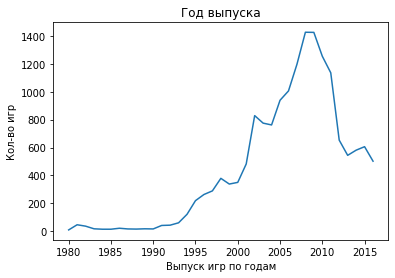

In [26]:
data.groupby('year_of_release')['name'].count().plot()

plt.xlabel('Выпуск игр по годам')
plt.ylabel('Кол-во игр')
plt.title('Год выпуска')

Вывод: С 1998-2000 годов наблюдается устойсивый объем выпуска игр не менее 400 в год.
До этого момента данными, скорее всего, можно пренебречь.
Кроме того, для целей определения бюджета на год даннных за 15 лет более чем достаточно (более древние данные будут описывать совсем другую ЦА) 


### Посмотрите, как менялись продажи по платформам. 

Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [28]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
Name: total_sales, dtype: float64

Вывод, по сумме  продаж  есть ярко выраженные 6 лидера. Построим по ним распрделение по годам

In [29]:
df1 = data.query('platform== "PS2" or platform== "X360" or platform== "PS3" or platform== "Wii"or platform== "DS"or platform== "PS"').pivot_table(
index = 'year_of_release',
columns = 'platform',
values = 'total_sales',
aggfunc = 'sum').fillna(0)



#df1.plot(kind = 'bar',colormap = 'Blues_r',stacked = True,grid = True,ax = axis[0])
#plt.show()

<AxesSubplot:xlabel='year_of_release'>

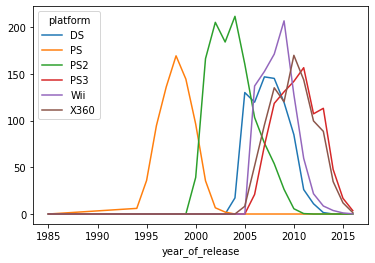

In [30]:
df1.plot()

Вывод: цикл жизни платформы примерно 5 лет. 

Для дальнейшего анализа возьмем данные за последние 5 лет
Причины: нам нужно планировать РК на след год - краткосрочное планирование
Цикл жизни платформы 5 лет. 


In [31]:
df  = data.query('year_of_release > 2011')


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.



<AxesSubplot:xlabel='year_of_release'>

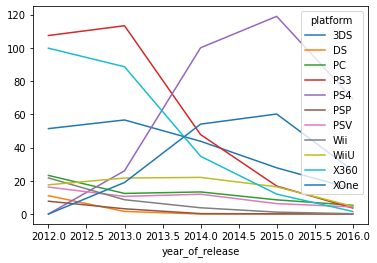

In [32]:
df.pivot_table(
index = 'year_of_release',
columns = 'platform',
values = 'total_sales',
aggfunc = 'sum').fillna(0).plot()

In [33]:
df.pivot_table(
index = 'year_of_release',
columns = 'platform',
values = 'total_sales',
aggfunc = 'sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012.0,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [34]:
d1 = df.pivot_table(
index = 'platform',
values = 'total_sales',
aggfunc = 'sum').reset_index()

d1.sort_values(by= 'total_sales')

,platform,total_sales
5,PSP,11.19
1,DS,12.55
7,Wii,35.37
6,PSV,49.18
2,PC,62.65
8,WiiU,82.19
10,XOne,159.32
0,3DS,194.61
9,X360,236.54
3,PS3,288.79


Вывод: в 2016 году мы видим снижение продаж по всем платформам. Похоже, что в 2017 стоит ожидать выходна новых платформ. 
Тем не менее самые популярные PS4 и XOne

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.


In [35]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-2.0,no_value,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-2.0,no_value,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [36]:
df.loc[df['platform']=='PS3']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Akatsuki no Goei Trinity,PS3,2012.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-2.0,no_value,0.01
16638,Tour de France 2014,PS3,2014.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,-1.0,-2.0,no_value,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-2.0,no_value,0.01


Вывод: Существуют огромные выбросы  - успешные игры, которые перетягивают на себя все продажи) 

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

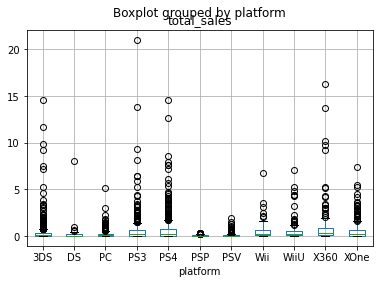

In [38]:
df.boxplot('total_sales',by='platform')

(0.0, 1.0)

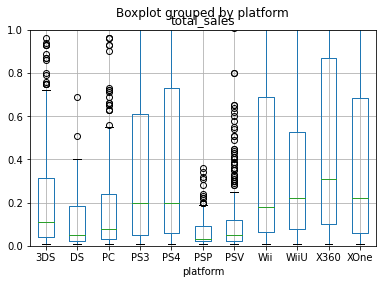

In [39]:
df.boxplot('total_sales',by='platform')
plt.ylim(0,1)

In [41]:
df.pivot_table(
index = ['name', 'year_of_release'],
values = 'total_sales',
aggfunc = 'sum').reset_index().sort_values(by='total_sales', ascending = False).head(10)

,name,year_of_release,total_sales
593,Grand Theft Auto V,2013.0,37.32
193,Call of Duty: Black Ops II,2012.0,29.40
194,Call of Duty: Ghosts,2013.0,27.39
192,Call of Duty: Black Ops 3,2015.0,25.67
191,Call of Duty: Advanced Warfare,2014.0,21.97
594,Grand Theft Auto V,2014.0,18.09
464,FIFA 15,2014.0,17.37
463,FIFA 14,2013.0,16.46
465,FIFA 16,2015.0,16.30
468,FIFA Soccer 13,2012.0,15.97


Вывод: в задаче не сказано, но в реальности наверное,  хорошо бы сделать категоризацию - укрупнить игры (без версий), платформы - без версий. Но тут нужно хорошо знать игровую сферу. Я тут новичок) ПОнимаю, что версии ФИФЫ разные, но игра одна и таже) 

###  Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 


Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Нужно обязательно фильтрануть "заглушки" 
critic_score заглушка -1 
и еще убререм нудевые оценки критиков - они нам сейчас ни к чему) 
и user_score  - заглушка -1 

#### PS4

In [42]:
df_PS4 = df.query('platform =="PS4" and critic_score> 0')

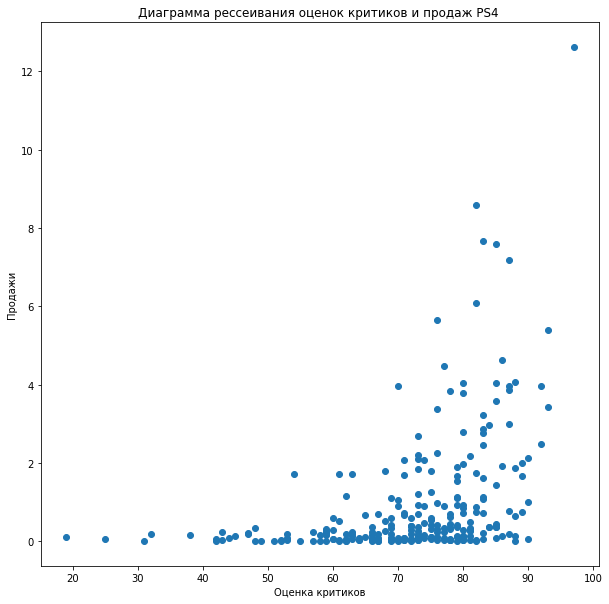

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x = df_PS4['critic_score'], y = df_PS4['total_sales'])
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")
plt.title ('Диаграмма рессеивания оценок критиков и продаж PS4 ')
plt.show()

In [45]:
df_PS4['critic_score'].corr(df_PS4['total_sales'])

0.40656790206178095

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

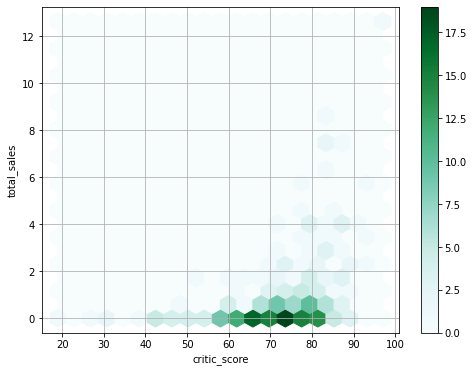

In [46]:
df_PS4.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 


Вывод: оценки критиков не влияют на продажи на платформе  PS4. Уоёф корреляции 0,4 - линейной зависимости между параметрами нет. 
**Посмотрим про оценку влияния пользвоателей**

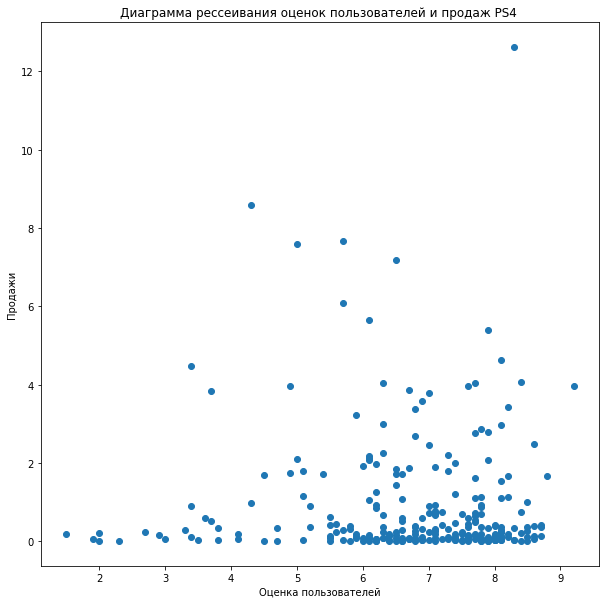

In [47]:
df_PS4 = df.query('platform =="PS4" and user_score> -1')
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x = df_PS4['user_score'], y = df_PS4['total_sales'])
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи")
plt.title ('Диаграмма рессеивания оценок пользователей и продаж PS4 ')
plt.show()

In [48]:
df_PS4['user_score'].corr(df_PS4['total_sales'])

-0.031957110204556376

Вывод: не влияют отзывы на продажи. Это конечно очень странно..... 

Сделаем те же расчеты для другой популярной платформы XOne

#### XOne

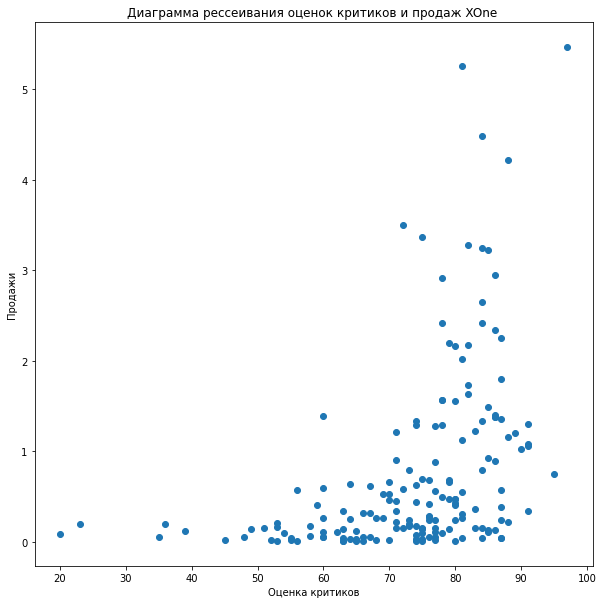

In [49]:
df_XOne = df.query('platform =="XOne" and critic_score> 0 ')
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x = df_XOne['critic_score'], y = df_XOne['total_sales'])
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")
plt.title ('Диаграмма рессеивания оценок критиков и продаж XOne ')
plt.show()



In [50]:
df_XOne['critic_score'].corr(df_XOne['total_sales'])

0.4169983280084017

**Посмотрим про оценку влияния пользвоателей**

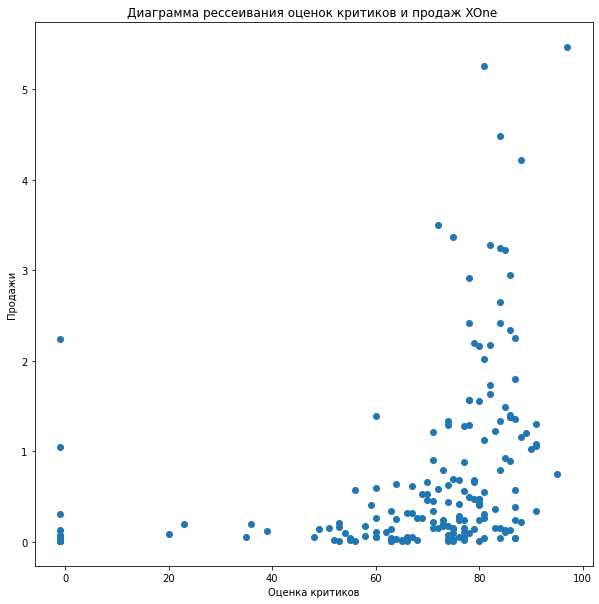

In [51]:
df_XOne = df.query('platform =="XOne" and user_score> -1 ')
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x = df_XOne['critic_score'], y = df_XOne['total_sales'])
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")
plt.title ('Диаграмма рессеивания оценок критиков и продаж XOne ')
plt.show()

In [52]:
df_XOne['user_score'].corr(df_XOne['total_sales'])

-0.06892505328279414

Вывод: для XOne зависимости между продажами и оценками критиков и пользователей не выявлено

**Соотнесите выводы с продажами игр на других платформах.**
Сделаем срез по другим платформам  возьмем платформы по убываниею продаж за последние 5 лет
это будут:

PS3
3DS
X360
WiiU
PC


**Оценка корреляции для critic_score**

In [53]:
df_other = df.query('(platform =="PS3" or platform =="3DS" or platform =="X360"or platform =="WiiU"or platform =="PC")  and critic_score> 0 ')

In [54]:
list = df_other['platform'].unique()
for i in list:
    df1 = df_other.loc[df_other['platform']== i]
    print ('Коэффициенты корреляции между critic_score и total_sales для платформы'
           , i,  df1['critic_score'].corr(df1['total_sales']))

Коэффициенты корреляции между critic_score и total_sales для платформы PS3 0.3314972592629587
Коэффициенты корреляции между critic_score и total_sales для платформы X360 0.3605734888507336
Коэффициенты корреляции между critic_score и total_sales для платформы 3DS 0.3208028695360785
Коэффициенты корреляции между critic_score и total_sales для платформы WiiU 0.34837976012017485
Коэффициенты корреляции между critic_score и total_sales для платформы PC 0.23724324311567915


Вывод: линейной зависимости между оценками критиков и продажами не выявлено

**Оценка корреляции для user_score**

In [55]:
df_other2 = df.query('(platform =="PS3" or platform =="3DS" or platform =="X360"or platform =="WiiU"or platform =="PC")  and user_score> -1 ')

In [56]:
list2 = df_other2['platform'].unique()
for i in list:
    df2 = df_other2 .loc[df_other2 ['platform']== i]
    print ('Коэффициенты корреляции между df_other2  и total_sales для платформы'
           , i,  df2['user_score'].corr(df2['total_sales']))

Коэффициенты корреляции между df_other2  и total_sales для платформы PS3 -0.005143522887113828
Коэффициенты корреляции между df_other2  и total_sales для платформы X360 0.006163978646213326
Коэффициенты корреляции между df_other2  и total_sales для платформы 3DS 0.19758263411038599
Коэффициенты корреляции между df_other2  и total_sales для платформы WiiU 0.4002190202148617
Коэффициенты корреляции между df_other2  и total_sales для платформы PC -0.12186747630735577


Вывод: нет зависимости между совокупными продажами и оценкой критиков и пользователей. Опять же странно 

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [60]:
df.groupby('genre').agg({'total_sales':'median', 'name':'count'} ).reset_index().sort_values(by='total_sales', ascending = False)




,genre,total_sales,name
8,Shooter,0.440,235
10,Sports,0.240,268
4,Platform,0.210,85
7,Role-Playing,0.140,370
6,Racing,0.140,115
2,Fighting,0.130,109
0,Action,0.120,1031
3,Misc,0.120,192
9,Simulation,0.120,80
11,Strategy,0.080,71


<AxesSubplot:>

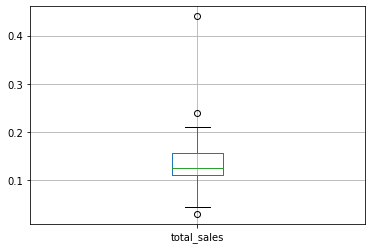

In [61]:
df.groupby('genre').agg({'total_sales':'median' }).boxplot()



Вывод:
существуют явный лидер по объему продаж - это жанр Shooter.

Второе и третье место - жанры Sports и Platform




Можно сказать, что жанры явно низкими продажами это Adventure и Puzzle


</font>
![image.png](attachment:image.png)

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.</font>

## Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### портрет пользователя региона NA

In [62]:
report = df.groupby('platform').agg({'na_sales':'sum'})
top_platforms  = report.sort_values(by='na_sales', ascending = False).head(5).index
report = report.reset_index()
report.loc[~report['platform'].isin(top_platforms), 'platform']='other'

report=report.groupby('platform').agg({'na_sales':'sum'})

report

,na_sales
platform,
3DS,55.31
PS3,103.38
PS4,108.74
X360,140.05
XOne,93.12
other,90.37


Вывод: топ-5 платформ в США X360, PS4, PS3, XOne и 3DS
    
    Почти четверть продаж у платформы X360, примерно поровну у остальных платформ со 2 по 4 место. Оставшиеся с большим отрывом 

Разберемся с жанрами в NA

In [63]:
report_genre = df.groupby('genre').agg({'na_sales':'sum'})
top_genre  = report_genre.sort_values(by='na_sales', ascending = False).head(5).index
report_genre = report_genre.reset_index()
report_genre.loc[~report_genre['genre'].isin(top_genre), 'genre']='other'

report_genre=report_genre.groupby('genre').agg({'na_sales':'sum'})

report_genre

,na_sales
genre,
Action,177.84
Misc,38.19
Role-Playing,64.00
Shooter,144.77
Sports,81.53
other,84.64


### портрет пользователя региона EU


In [64]:
df_EU = df.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).reset_index()
total_sales_EU = round(df_EU['eu_sales'].sum(),0)
df_EU['total_sales_EU'] = total_sales_EU
df_EU['share_sales_%'] = round ((df_EU['eu_sales']/df_EU['total_sales_EU'])*100,0)

In [65]:
report_EU = df.groupby('platform').agg({'eu_sales':'sum'})
top_platforms  = report_EU.sort_values(by='eu_sales', ascending = False).head(5).index
report_EU = report_EU.reset_index()
report_EU.loc[~report_EU['platform'].isin(top_platforms), 'platform']='other'

report_EU=report_EU.groupby('platform').agg({'eu_sales':'sum'})

In [66]:
report_EU

,eu_sales
platform,
3DS,42.64
PS3,106.86
PS4,141.09
X360,74.52
XOne,51.59
other,90.12


Вывод: В Европе уверенно лидирует PS4	, с небольшим отрывом PS3 , и только потом X360	

In [67]:
df_EU_genre = df.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).reset_index()

df_EU_genre ['total_sales_EU'] = total_sales_EU
df_EU_genre ['share_sales_%'] = round ((df_EU_genre['eu_sales']/df_EU_genre['total_sales_EU'])*100,0)

In [68]:
df_EU_genre

,genre,eu_sales,total_sales_EU,share_sales_%
0,Action,159.34,507.0,31.0
1,Shooter,113.47,507.0,22.0
2,Sports,69.09,507.0,14.0
3,Role-Playing,48.53,507.0,10.0
4,Racing,27.29,507.0,5.0
5,Misc,26.32,507.0,5.0
6,Platform,21.41,507.0,4.0
7,Simulation,14.55,507.0,3.0
8,Fighting,10.79,507.0,2.0
9,Adventure,9.46,507.0,2.0


Вывод: самые популярные жанры: Action. Shooter. Sports

In [69]:
report_genre_EU = df.groupby('genre').agg({'eu_sales':'sum'})
top_genre  = report_genre_EU.sort_values(by='eu_sales', ascending = False).head(5).index
report_genre_EU = report_genre_EU.reset_index()
report_genre_EU.loc[~report_genre_EU['genre'].isin(top_genre), 'genre']='other'

report_genre_EU=report_genre_EU.groupby('genre').agg({'eu_sales':'sum'})

report_genre_EU

,eu_sales
genre,
Action,159.34
Racing,27.29
Role-Playing,48.53
Shooter,113.47
Sports,69.09
other,89.10


### портрет пользователя региона JP


In [70]:
df_JP = df.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).reset_index()
total_sales_JP = round(df_JP['jp_sales'].sum(),0)
df_JP['total_sales_JP'] = total_sales_JP
df_JP['share_sales_%'] = round ((df_JP['jp_sales']/df_JP['total_sales_JP'])*100,0)

In [71]:
report_JP = df.groupby('platform').agg({'jp_sales':'sum'})
top_platforms  = report_JP.sort_values(by='jp_sales', ascending = False).head(5).index
report_JP = report_JP.reset_index()
report_JP.loc[~report_JP['platform'].isin(top_platforms), 'platform']='other'

report_JP=report_JP.groupby('platform').agg({'jp_sales':'sum'})

In [72]:
df_JP

,platform,jp_sales,total_sales_JP,share_sales_%
0,3DS,87.79,193.0,45.0
1,PS3,35.29,193.0,18.0
2,PSV,21.04,193.0,11.0
3,PS4,15.96,193.0,8.0
4,WiiU,13.01,193.0,7.0
5,PSP,10.47,193.0,5.0
6,DS,3.72,193.0,2.0
7,Wii,3.39,193.0,2.0
8,X360,1.57,193.0,1.0
9,XOne,0.34,193.0,0.0


Вывод: В Японии свой рынок, Лидирут некая 3DS и разные версии PS

In [73]:
df_JP_genre = df.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).reset_index()

df_JP_genre ['share_sales_%'] = round ((df_JP_genre['jp_sales']/total_sales_JP)*100,0)
df_JP_genre

,genre,jp_sales,share_sales_%
0,Role-Playing,65.44,34.0
1,Action,52.80,27.0
2,Misc,12.86,7.0
3,Simulation,10.41,5.0
4,Fighting,9.44,5.0
5,Shooter,9.23,5.0
6,Platform,8.63,4.0
7,Adventure,8.24,4.0
8,Sports,8.01,4.0
9,Strategy,2.88,1.0


Вывод: по жанрам в Японии тоже сильно отличается от Америки и Европы. В Лидерах Playing, с большим отрывом Action
Отсальные жанры не значительны. 

In [74]:
report_genre_JP = df.groupby('genre').agg({'jp_sales':'sum'})
top_genre  = report_genre_JP.sort_values(by='jp_sales', ascending = False).head(5).index
report_genre_JP = report_genre_JP.reset_index()
report_genre_JP.loc[~report_genre_JP['genre'].isin(top_genre), 'genre']='other'

report_genre_JP=report_genre_JP.groupby('genre').agg({'jp_sales':'sum'})

report_genre_JP

,jp_sales
genre,
Action,52.80
Fighting,9.44
Misc,12.86
Role-Playing,65.44
Simulation,10.41
other,41.63


### Обобщающие диаграммы по регионам

#### Структура по платформам

Text(0.5, 1.0, 'Топ-5 платформ в NA')

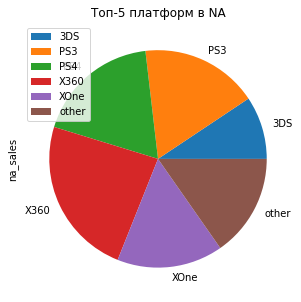

In [75]:
plot = report.plot.pie(y='na_sales', figsize=(5, 5))
plt.title ('Топ-5 платформ в NA')

Text(0.5, 1.0, 'Топ-5 платформ в EU')

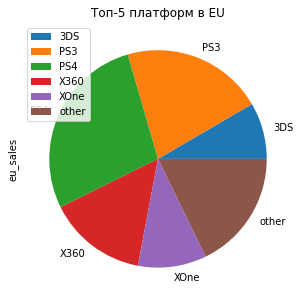

In [76]:
plot = report_EU.plot.pie(y='eu_sales', figsize=(5, 5))
plt.title ('Топ-5 платформ в EU')

Text(0.5, 1.0, 'Топ-5 платформ в JP')

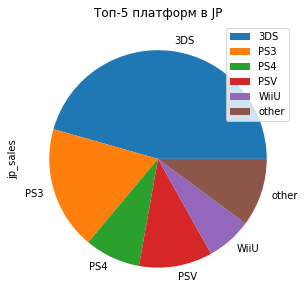

In [77]:
plot = report_JP.plot.pie(y='jp_sales', figsize=(5, 5))
plt.title ('Топ-5 платформ в JP')

Вывод:
В структуре США лидируют модификации поатформ PS  и Xone
В Европе аналогично

ОДнако в Японии лидером явлеется 3DS (более половина рынка), в то время как в Америке и Европе эта платформа входит в топ-5 , но не является лидирующей.

#### Структура по жанрам

Text(0.5, 1.0, 'Топ-5 жанров в NA')

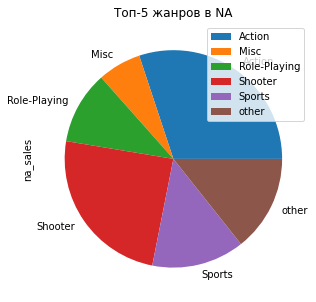

In [78]:
plot = report_genre.plot.pie(y='na_sales', figsize=(5, 5))
plt.title ('Топ-5 жанров в NA')

Text(0.5, 1.0, 'Топ-5 жанров в EU')

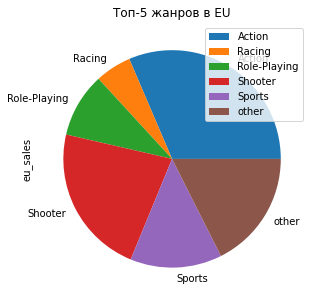

In [79]:
plot = report_genre_EU.plot.pie(y='eu_sales', figsize=(5, 5))
plt.title ('Топ-5 жанров в EU')

Text(0.5, 1.0, 'Топ-5 жанров в JP')

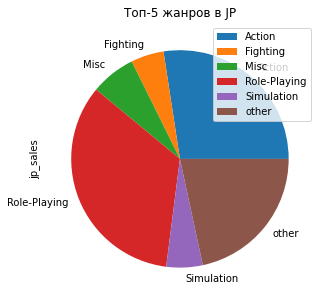

In [80]:
plot = report_genre_JP.plot.pie(y='jp_sales', figsize=(5, 5))
plt.title ('Топ-5 жанров в JP')

Вывод: В Америке и Европе самые популярные жанры это Action и Shooter
В Японии же самую большую долю занимает Role-Playing

Итго, можно говорить о том, что рынок Японии очень сильно отличается от рынков Америки и Европы. 

 ### Влияет ли рейтинг ESRB на продажи в отдельном регионе?
 
 сделаем таблицу по структуре рейтинга , регионам и продажам. И посмотрим на данные...

In [81]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-2.0,no_value,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-2.0,no_value,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [82]:
ESRB_raiting = df.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'} ).reset_index()
#total_sales_NA = round(df_NA['na_sales'].sum(),0)
#ESRB_raiting['structure_na_sales_%'] = round(ESRB_raiting['na_sales']/total_sales_NA*100,0)
#ESRB_raiting['structure_eu_sales_%'] = round(ESRB_raiting['eu_sales']/total_sales_EU*100,0)
#ESRB_raiting['structure_jp_sales_%'] = round(ESRB_raiting['jp_sales']/total_sales_JP*100,0)

In [83]:
ESRB_raiting

,rating,na_sales,eu_sales,jp_sales
0,E,114.37,113.03,28.33
1,E10+,75.70,55.37,8.19
2,M,231.57,193.96,21.20
3,T,66.02,52.96,26.02
4,no_value,103.31,91.50,108.84


Вывод:
можно сказать, что Япония по структуре продаж в разрезе рейтинга сильно отличается от Европы и Америки.
Именно в Японии доля продаж игр "без рейтинга" максимально высокая. 
В Европе и Америке доля игр для взрослых (М) - самая большая. И да, рейттинг влияет. 
Отсюда можно сделать вывод, что для ползователей из Японии рейтинг особого значения не имеет.

# Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются
Выбрала двустороннюю гипотезу, так как нам не важно нам данном этапе какая платформа лучше/хуже
тест о равенстве средних двух генеральных совокупностей - так как нам нужно сравнить средние двух генеральных совокупностей

In [84]:
df_PC = df.loc[df['platform']=='PC']
df_PC =df_PC.query('user_score >0')
sample1 = df_PC['user_score']

df_XOne = df.loc[df['platform']=='XOne']
df_XOne=df_XOne.query('user_score >0')
sample2 = df_XOne['user_score']

alpha = 0.05


results = st.ttest_ind (sample1,sample2) 

print('p-значение:', results.pvalue) 

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Вывод:  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

## Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: Средние пользовательские рейтинги платформ Action  и Sports одинаковые
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются
Выбрала двустороннюю гипотезу, так как нам не важно нам данном этапе кто лучше а кто хуже
тест о равенстве средних двух генеральных совокупностей - так как нам нужно сравнить средние двух генеральных совокупностей
рассчеты, аналогичные предудущему пункту



In [86]:
df_Action = df.loc[df['genre']=='Action']
df_Action =df_Action.query('user_score >0')
sample1 = df_Action['user_score']

df_Sports = df.loc[df['genre']=='Sports']
df_Sports=df_Sports.query('user_score >0')
sample2 = df_Sports['user_score']

alpha = 0.05



results = st.ttest_ind (sample1,sample2) 

print('p-значение:', results.pvalue) 

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги разные

In [87]:
df_total = df.query('user_score >0')

df_total.head()



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [88]:
df_total.groupby('platform')['user_score'].mean()

platform
3DS     7.033333
DS      7.000000
PC      6.428641
PS3     6.532862
PS4     6.748249
PSP     5.950000
PSV     7.410000
Wii     6.082353
WiiU    6.904000
X360    6.220851
XOne    6.521429
Name: user_score, dtype: float64

In [89]:
df_total.groupby('genre')['user_score'].mean()

genre
Action          6.825048
Adventure       7.466667
Fighting        6.895714
Misc            6.938806
Platform        6.806061
Puzzle          7.633333
Racing          6.151163
Role-Playing    7.258480
Shooter         6.435897
Simulation      6.511905
Sports          5.455897
Strategy        6.420000
Name: user_score, dtype: float64

# Выводы

В работе была проведена предобработка данных - заменены типы данных, заполнны пропуски.
Выявлен характерный период обновления игровых платформ (раз в 5 лет)
В целом , для планирования РК на след год, по опыту лучше опираться на даные проглого года (самые свежие). В рамках работы быд рассмотрен период 5 лет. 
Для более точного планирования РК можно дать рекомендацию более четкого изучения игр (а не ограничиваться платформими и жанрами) Но это уже зависит от структуры бизнеса заказчика и его ожиданий.





**Выводы **

1. Рынки Америки и Европы имеют больше сходств. Рынок Японии имеет сильные различия. 
1.В результате проведенного исследования рекомендуем для рекламы платформы: PS4 и XOne
2. Жанры игр, куда рекомендуем рекламный бюджет: Shooter, Sports и Platform - это  жанры с лучшей средней прибылью на  одну игру. 
3. Рейтинг ESRB:
В Европе и Америке доля игр для взрослых (М) - самая большая. В Японии рейтинг ESRB особой роли не играет, так как там есть свой собственный ректинг. Таким образом, рекомендация распределять большую часть бюджета в категории игр для взрослых. Затем следуют категории «для всех» и потом для детей 10+
4. Влияния  отзывов на продажи выявлено не было. То есть особого внимания обращать на отзывы не следует) 
Однако, продажи игр подвержены огромным колебанияем по выручке, что означает, что есть несколько очень популярных игр. И при выборе игр для рекламирования, нужно оценивать и экспертные мнения. 
